In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os

import numpy as np
from matplotlib import pyplot as plt
import matplotlib.cm as cm

import pickle

import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.layers import Dense, Flatten, MaxPooling2D
from tensorflow.keras import Input
from tensorflow.keras.layers import Dropout, BatchNormalization
from sklearn.model_selection import train_test_split
import cv2
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

In [ ]:
# dir(tf.keras.applications)

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50

> ### 제로 센터링 및 형변환 to int8, float32

In [ ]:
with open('/content/drive/MyDrive/Data Science/알파코 딥러닝 부트캠프/프로젝트/이미지 분류 미니프로젝트/x_datasets.pickle', 'rb') as f:
    x_datasets = pickle.load(f)

with open('/content/drive/MyDrive/Data Science/알파코 딥러닝 부트캠프/프로젝트/이미지 분류 미니프로젝트/y_datasets.pickle', 'rb') as f:
    y_datasets = pickle.load(f)

In [ ]:
# 제로 센터링

def preprocess(image, grayscale=False):
    # zero-centering
    image = image - np.mean(image, axis=0)
    
    # grayscale
    if grayscale:
        image = tf.image.rgb_to_grayscale(image)
    return image

In [ ]:
x_datasets = preprocess(x_datasets)

In [ ]:
x_datasets.dtype, y_datasets.dtype

(dtype('float64'), dtype('int64'))

In [ ]:
x_datasets = x_datasets.astype('float32')
y_datasets = y_datasets.astype('int8')

In [ ]:
x_datasets.dtype, y_datasets.dtype

(dtype('float32'), dtype('int8'))

> ### 증식

In [ ]:
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
)

In [ ]:
len(x_datasets)

4052

In [ ]:
print('x_datasets.dtype, y_datasets.dtype, x_datasets.shape, y_datasets.shape')
x_datasets.dtype, y_datasets.dtype, x_datasets.shape, y_datasets.shape

x_datasets.dtype, y_datasets.dtype, x_datasets.shape, y_datasets.shape


(dtype('float32'), dtype('int8'), (4052, 256, 256, 3), (4052, 1))

In [ ]:
x_augmented = np.empty((0, 256, 256, 3), dtype='float32')
y_augmented = np.empty((0, 1), dtype='int8')

In [ ]:
print('x_augmented.dtype, y_augmented.dtype, x_augmented.shape, y_augmented.shape')
x_augmented.dtype, y_augmented.dtype, x_augmented.shape, y_augmented.shape

x_augmented.dtype, y_augmented.dtype, x_augmented.shape, y_augmented.shape


(dtype('float32'), dtype('int8'), (0, 256, 256, 3), (0, 1))

In [ ]:
for batch in datagen.flow(x_datasets, y=y_datasets, batch_size=64):
    print(len(x_augmented),len(y_augmented))
    if len(x_augmented) >= 8104:
        break
    else:
        x_augmented = np.concatenate((x_augmented, batch[0]), axis=0)
        y_augmented = np.concatenate((y_augmented, batch[1]), axis=0)

0 0
64 64
128 128
192 192
256 256
320 320
384 384
448 448
512 512
576 576
640 640
704 704
768 768
832 832
896 896
960 960
1024 1024
1088 1088
1152 1152
1216 1216
1280 1280
1344 1344
1408 1408
1472 1472
1536 1536
1600 1600
1664 1664
1728 1728
1792 1792
1856 1856
1920 1920
1984 1984
2048 2048
2112 2112
2176 2176
2240 2240
2304 2304
2368 2368
2432 2432
2496 2496
2560 2560
2624 2624
2688 2688
2752 2752
2816 2816
2880 2880
2944 2944
3008 3008
3072 3072
3136 3136
3200 3200
3264 3264
3328 3328
3392 3392
3456 3456
3520 3520
3584 3584
3648 3648
3712 3712
3776 3776
3840 3840
3904 3904
3968 3968
4032 4032
4052 4052
4116 4116
4180 4180
4244 4244
4308 4308
4372 4372
4436 4436
4500 4500
4564 4564
4628 4628
4692 4692
4756 4756
4820 4820
4884 4884
4948 4948
5012 5012
5076 5076
5140 5140
5204 5204
5268 5268
5332 5332
5396 5396
5460 5460
5524 5524
5588 5588
5652 5652
5716 5716
5780 5780
5844 5844
5908 5908
5972 5972
6036 6036
6100 6100
6164 6164
6228 6228
6292 6292
6356 6356
6420 6420
6484 6484
6548 654

In [ ]:
print('x_augmented.dtype, y_augmented.dtype, x_augmented.shape, y_augmented.shape')
x_augmented.dtype, y_augmented.dtype, x_augmented.shape, y_augmented.shape

x_augmented.dtype, y_augmented.dtype, x_augmented.shape, y_augmented.shape


(dtype('float32'), dtype('int8'), (8104, 256, 256, 3), (8104, 1))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


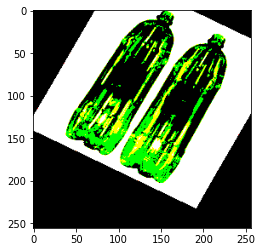

In [ ]:
plt.imshow(x_augmented[2321])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


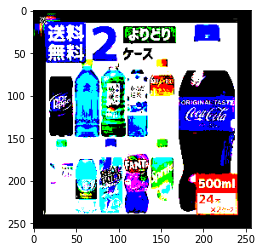

In [ ]:
plt.imshow(x_datasets[2321])

In [ ]:
with open('x_datasets.pickle', 'wb') as f:
    pickle.dump(x_datasets, f)

with open('y_datasets.pickle', 'wb') as f:
    pickle.dump(y_datasets, f)

In [ ]:
with open('x_augmented.pickle', 'wb') as f:
    pickle.dump(x_augmented, f, protocol=4)

with open('y_augmented.pickle', 'wb') as f:
    pickle.dump(y_augmented, f)

In [ ]:
x = "hello"

#if condition returns False, AssertionError is raised:
assert x == "goodbye"